In [6]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, confusion_matrix
import joblib
import seaborn as sns

In [7]:
folder_path = "D:/Joy/Research_Joy/Music_Research/all_dataset/6s_clips"
file_names = [file for file in os.listdir(folder_path) if file.endswith('.wav')]
raga_names = [name[:-9] for name in file_names]

In [8]:
print(file_names[:5])
print(raga_names[:5])

['Kalyani_1.wav', 'Kalyani_10.wav', 'Kalyani_100.wav', 'Kalyani_1000.wav', 'Kalyani_1001.wav']
['Kaly', 'Kalya', 'Kalyan', 'Kalyani', 'Kalyani']


In [9]:
def features_extractor(file_or_audio, sample_rate=None):
    if isinstance(file_or_audio, str):
        audio, sample_rate = librosa.load(file_or_audio)
    else:
        audio = file_or_audio

    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs.T, axis=0)
    return mfccs_scaled_features

extracted_features = []

In [10]:
for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    features = features_extractor(file_path)
    extracted_features.append([features, file_name.split('_')[0]])

features_df = pd.DataFrame(extracted_features, columns=['feature', 'class'])
features_df.head()

,feature,class
0,"[-213.49275, 48.217747, -4.497308, 6.947563, -...",Kalyani
1,"[-201.19559, 82.80386, -21.552214, 1.0177306, ...",Kalyani
2,"[-170.64688, 98.50378, -30.200146, 35.70823, -...",Kalyani
3,"[-312.86093, 101.631966, -32.33025, -24.92433,...",Kalyani
4,"[-189.64346, 68.54896, -67.68566, -12.999073, ...",Kalyani


In [11]:
X = np.array(features_df['feature'].tolist())
y = np.array(features_df['class'].tolist())

In [12]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=127)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [14]:
joblib_file = "decision_tree_model.pkl"
joblib.dump(dt, joblib_file)
print(f"Model saved to {joblib_file}")



Model saved to decision_tree_model.pkl


In [15]:
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {accuracy * 100}%")

Test set accuracy: 80.02950396459524%


Test set F1 score: 0.7985651699091766
Confusion Matrix:
[[434   2   0   0   0   7   2   0   6   2   8]
 [  9 370   8  11   5   7  17  15  21  16  24]
 [  6  14 375  13   4  15   7  26  13  33  24]
 [  1   3  15 459   4  10   4   7   4  12  16]
 [  0   1   7   3 403  10   1   2   7  16   2]
 [  5  10  12   6   9 375   6   5  13  11  17]
 [  0   6   6   3   0   0 452   2   3   7   0]
 [  5  10  12   0   2   0   4 456   8  13  10]
 [  9  37  10  10  11  16   8   6 351  18  14]
 [ 16  12  20  11  25  15  10  14  18 326  27]
 [ 15  15  20  10   9  13   6  14  26  23 339]]


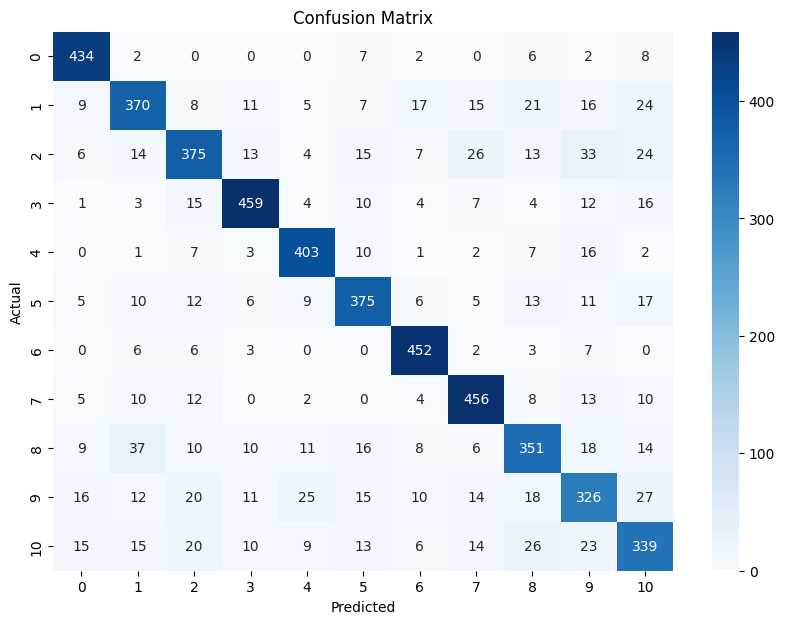

In [16]:
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Test set F1 score: {f1}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()



In [17]:
dt_loaded = joblib.load(joblib_file)
print("Model loaded successfully")

Model loaded successfully


In [19]:
file = "D:/Joy/Research_Joy/Music_Research/all_dataset/6s_clips/Kalyani_12.wav"
x, sr1 = librosa.load(file)
ipd.Audio(x, rate=sr1)

In [20]:
prediction_feature = features_extractor(file)
prediction_feature = prediction_feature.reshape(1, -1)
predicted_class_label = dt_loaded.predict(prediction_feature)
prediction_class = le.inverse_transform(predicted_class_label)
print("Predicted class:", prediction_class[0])

Predicted class: Kalyani
